# Relevant data

In [1]:
from zenodoExplorer.zenexp  import ze

recIDs = [10835267, 10890165]
with open("api.key", "r") as keyFile:
    ACCESS_TOKEN = keyFile.readline().rstrip()

ze = ze(ACCESS_TOKEN, recIDs, cache='~/.zenodo_cache/')

In [2]:
ze.read_zdb()
ze.zdb.del_dat_tree('td2@10835267')
ze.zdb.del_dat_tree('ml1@10835267')
ze.zdb.plot()

In [3]:
ze.zdb.to_pd('TrainData')

,at_conf,ab_init_code,ab_init_theo,zip,file
tag,,,,,
td1@10835267,ac1@10835267,CASTEP,PBE-D2,TrainData,Train16_PBED2.xyz
td1@10890165,ac1@10835267,CASTEP (ASE+LAMMPS),PBE-D2 (-fixed charge baseline),TrainData_IBM23,IBM23_PBED2_Castep-LR.xyz


In [4]:
ze.zdb.to_pd('MLIPs')

,tr_data,ml_code,ml_settings,fit_prop,zip,file
tag,,,,,,
ml2@10835267,td1@10835267,GAP,"DTS, Rcut 3/6","energy, forces, virial",MLIP_GAP_Gen16DTS_PBED2,gapmodel.xml
ml1@10890165,td1@10835267,GAP,"DTS, Rcut 3/6 (seeds 1,2,3)","energy, forces, virial",MLIP_GAP36_IBM23,gapmodel_no*.xml
ml2@10890165,td1@10890165,GAP,"DTS, Rcut 3/6","energy, forces, virial",MLIP_GAP36_IBM23-LR,gapmodel.xml
ml3@10890165,td1@10835267,MACE,"Layers 2, Rcut 4+4","energy, forces, virial",MLIP_MACE44_IBM23,macemodel.model
ml4@10890165,td1@10835267,MACE,"Layers 2, Rcut 6+6","energy, forces, virial",MLIP_MACE66_IBM23,macemodel.model


In [5]:
ze.zdb.to_pd('MDSims')

,pes_model,md_code,md_system,md_no_at,md_ensmb,md_step,md_len,md_temp,md_pres,zip,file
tag,,,,,,,,,,,
md1@10890165,ml2@10835267,LAMMPS,"33% EC:EMC (seeds 1,2,3)",640,"NPT, NVT",1.0 fs,0.6 ns,500 K,1 atm,MDSims_GAP36_SR_Lmp,"NPT/npt0[0-5].thermo, NPT/npt0[0-5].lammpstrj,..."
md2@10890165,ml1@10890165,LAMMPS,33% EC:EMC,640,"NPT, NVT",1.0 fs,0.6 ns,500 K,1 atm,MDSims_GAP36_SR_Lmp,"NPT/npt03_no[0-3].thermo, NPT/npt03_no[0-3].la..."
md3@10890165,ml2@10890165,LAMMPS,"33% EC:EMC (seeds 1,2,3)",640,"NPT, NVT",1.0 fs,1.0 ns,500 K,1 atm,MDSims_GAP36_LR_Lmp,"NPT/npt0[0-5].thermo, NPT/npt0[0-5].lammpstrj,..."
md4@10890165,ml4@10890165,LAMMPS,33% EC:EMC,640,"NPT, NVT",1.0 fs,0.5 ns,500 K,1 atm,MDSims_MACE66_SR_Lmp,"NPT/npt03.thermo, NPT/npt03.lammpstrj, NVT/nvt..."
md5@10890165,ml3@10890165,LAMMPS,33% EC:EMC,640,"NPT, NVT",1.0 fs,0.9 ns,500 K,1 atm,MDSims_MACE44_SR_Lmp,"NPT/npt03.thermo, NPT/npt03.lammpstrj, NVT/nvt..."
md6@10890165,ml3@10890165,ASE,"33% EC:EMC (seeds 1,2,3)",640,"NPT, NVT",1.0 fs,0.9 ns,500 K,1 atm,MDSims_MACE44_SR_Ase,"NPT/npt0[0-5].thermo, NPT/npt0[0-5].xyz, NVT/n..."


# Compare MACE vs GAP trained on full data

In [6]:
ze.read_dat_files('md1@10890165')

['/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt01.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt01.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt03.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt03.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt05.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt05.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt01.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt01.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt03.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt03.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt05.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt05.thermo']

In [7]:
ze.read_dat_files('md2@10890165')

['/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt03_no1.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt03_no1.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt03_no2.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt03_no2.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt03_no3.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NPT/npt03_no3.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt03_no1.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt03_no1.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt03_no2.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt03_no2.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt03_no3.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_SR_Lmp/NVT/nvt03

In [8]:
ze.read_dat_files('md3@10890165')

['/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NPT/npt01.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NPT/npt01.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NPT/npt03.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NPT/npt03.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NPT/npt05.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NPT/npt05.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NVT/nvt01.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NVT/nvt01.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NVT/nvt03.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NVT/nvt03.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NVT/nvt05.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_GAP36_LR_Lmp/NVT/nvt05.thermo']

In [9]:
ze.read_dat_files('md4@10890165')

['/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE66_SR_Lmp/NPT/npt03.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE66_SR_Lmp/NPT/npt03.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE66_SR_Lmp/NVT/nvt03.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE66_SR_Lmp/NVT/nvt03.thermo']

In [10]:
ze.read_dat_files('md5@10890165')

['/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Lmp/NPT/npt03.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Lmp/NPT/npt03.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Lmp/NVT/nvt03.lammpstrj',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Lmp/NVT/nvt03.thermo']

In [11]:
ze.read_dat_files('md6@10890165')

['/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NPT/npt01.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NPT/npt01.xyz',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NPT/npt03.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NPT/npt03.xyz',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NPT/npt05.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NPT/npt05.xyz',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NVT/nvt01.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NVT/nvt01.xyz',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NVT/nvt03.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NVT/nvt03.xyz',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NVT/nvt05.thermo',
 '/Users/imagdau/.zenodo_cache/10890165/MDSims_MACE44_SR_Ase/NVT/nvt05.xyz']

# To Do List

- dynamics with MP0+D2, compare to MP0+D3, densities and diffusivities
- transfer-learrn MP0 to 5 different datasets used by Sam

# Compare MACE models with ScaleShiftMACEmodels on the the 4 abblation studies

### 1. Errors on full train set

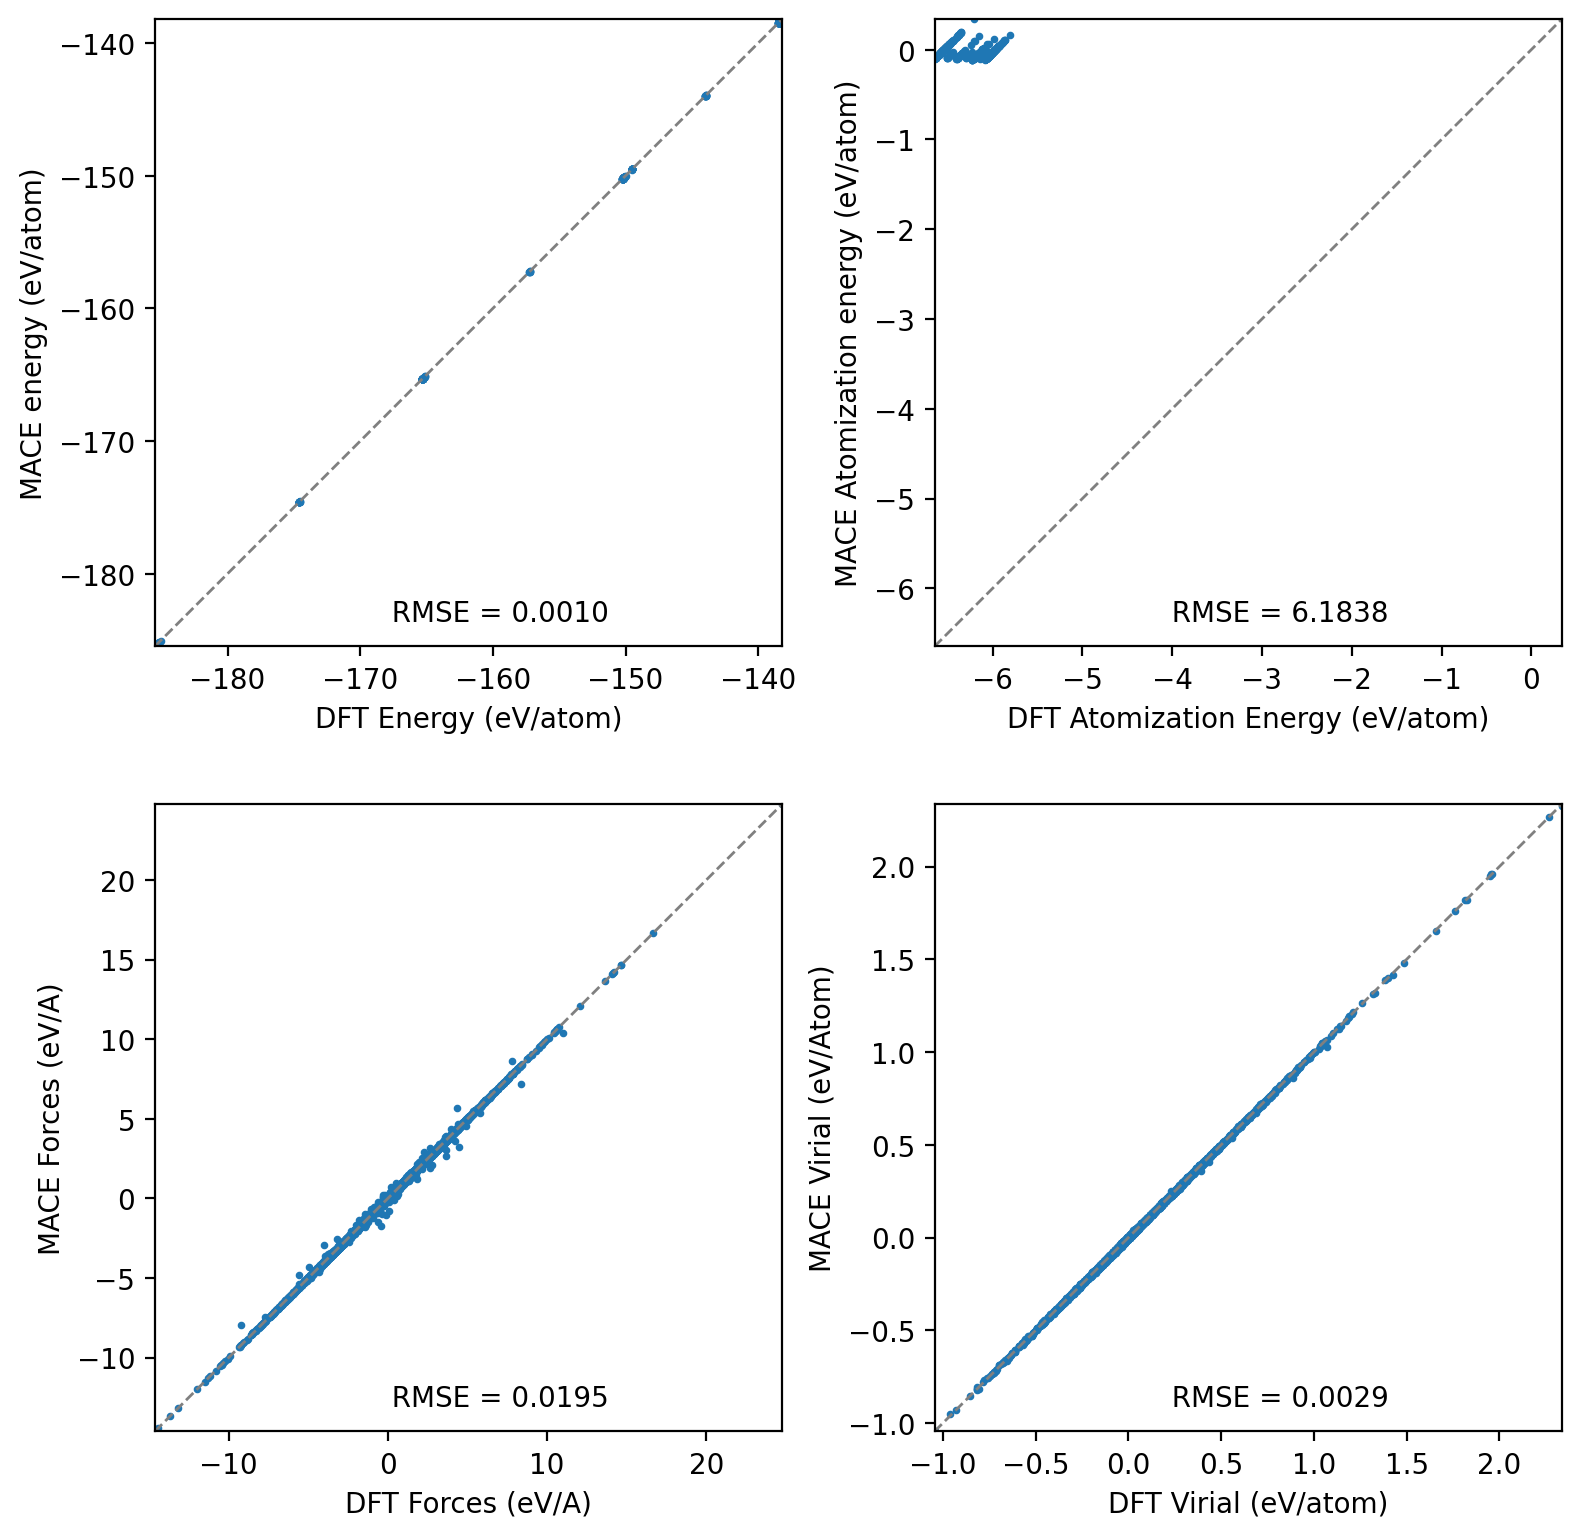

In [12]:
from glob import glob
from ase.io import read
from aseMolec import extAtoms as ea
from aseMolec import anaAtoms as aa
from aseMolec import pltProps as pp
from matplotlib import pyplot as plt
import numpy as np

wdir = '/Users/imagdau/Collaborations/05-SamNibblet/06-MACE-models-4Exp/'
model = 'tests/old/QBC_3/'
file = 'Train16_PBED2.xyz'
figname = wdir+'figs/QBC3_ScaleShiftMACE_train.png'

dat_dft = read(glob(wdir+'tests/PBED2/'+file)[0], ':')
dat_mce = read(glob(wdir+model+file)[0], ':')
ea.rename_prop_tag(dat_mce, 'MACE_energy', 'energy')
ea.rename_prop_tag(dat_mce, 'MACE_forces', 'forces')
ea.rename_prop_tag(dat_mce, 'MACE_stress', 'stress')
ea.calc_virial(dat_mce)

plt.figure(figsize=(8, 8), dpi=200)
#energy
plt.subplot(2,2,1)
pp.plot_prop(
    ea.get_prop(dat_dft[3:], 'info', 'energy', peratom=True),
    ea.get_prop(dat_mce[3:], 'info', 'energy', peratom=True),
    labs=['DFT Energy (eV/atom)', 'MACE energy (eV/atom)']
)
#atomization energy
plt.subplot(2,2,2)
pp.plot_prop(
    ea.get_prop(dat_dft[3:], 'bind', E0=ea.get_E0(dat_dft), peratom=True),
    ea.get_prop(dat_mce[3:], 'bind', E0=ea.get_E0(dat_mce), peratom=True),
    labs=['DFT Atomization Energy (eV/atom)', 'MACE Atomization energy (eV/atom)']
)
#forces
plt.subplot(2,2,3)
pp.plot_prop(
    np.concatenate(ea.get_prop(dat_dft[3:], 'arrays', 'forces')).flatten(),
    np.concatenate(ea.get_prop(dat_mce[3:], 'arrays', 'forces')).flatten(),
    labs=['DFT Forces (eV/A)', 'MACE Forces (eV/A)']
)
#virial
plt.subplot(2,2,4)
pp.plot_prop(
    ea.get_prop(dat_dft[3:], 'info', 'virial', peratom=True).flatten(),
    ea.get_prop(dat_mce[3:], 'info', 'virial', peratom=True).flatten(),
    labs=['DFT Virial (eV/atom)', 'MACE Virial (eV/Atom)']
)
plt.tight_layout()
plt.savefig(figname, format='png', dpi=300)

In [13]:
from pandas import DataFrame as df
import seaborn as sns

rmse_dict = dict(
    vers = [],
    set = [],
    mod = [],
    key = [],
    val = []
)

for vers in ['old', 'new']:
    for set in ['OPLS', 'SM', 'VS', 'QBC']:
        for mod in ['1', '2', '3', '4', '5']:
            model = 'tests/'+vers+'/'+set+'_'+mod+'/'
            dat_dft = read(glob(wdir+'tests/PBED2/'+file)[0], ':')
            dat_mce = read(glob(wdir+model+file)[0], ':')
            ea.rename_prop_tag(dat_mce, 'MACE_energy', 'energy')
            ea.rename_prop_tag(dat_mce, 'MACE_forces', 'forces')
            ea.rename_prop_tag(dat_mce, 'MACE_stress', 'stress')
            ea.calc_virial(dat_mce)

            #energy
            rmse = pp.plot_prop(
                ea.get_prop(dat_dft[3:], 'info', 'energy', peratom=True),
                ea.get_prop(dat_mce[3:], 'info', 'energy', peratom=True),
                labs=['DFT Energy (eV/atom)', 'MACE energy (eV/atom)']
            );
            rmse_dict['vers'] += [vers]
            rmse_dict['set'] += [set]
            rmse_dict['mod'] += [mod]
            rmse_dict['key'] += ['energy']
            rmse_dict['val'] += [rmse]
            
            #atomization energy
            rmse = pp.plot_prop(
            ea.get_prop(dat_dft[3:], 'bind', E0=ea.get_E0(dat_dft), peratom=True),
                ea.get_prop(dat_mce[3:], 'bind', E0=ea.get_E0(dat_mce), peratom=True),
                labs=['DFT Atomization Energy (eV/atom)', 'MACE Atomization energy (eV/atom)']
            );
            rmse_dict['vers'] += [vers]
            rmse_dict['set'] += [set]
            rmse_dict['mod'] += [mod]
            rmse_dict['key'] += ['atomization']
            rmse_dict['val'] += [rmse]
            
            #forces
            rmse = pp.plot_prop(
                np.concatenate(ea.get_prop(dat_dft[3:], 'arrays', 'forces')).flatten(),
                np.concatenate(ea.get_prop(dat_mce[3:], 'arrays', 'forces')).flatten(),
                labs=['DFT Forces (eV/A)', 'MACE Forces (eV/A)']
            );
            rmse_dict['vers'] += [vers]
            rmse_dict['set'] += [set]
            rmse_dict['mod'] += [mod]
            rmse_dict['key'] += ['forces']
            rmse_dict['val'] += [rmse]
            
            #virials
            pp.plot_prop(
                ea.get_prop(dat_dft[3:], 'info', 'virial', peratom=True).flatten(),
                ea.get_prop(dat_mce[3:], 'info', 'virial', peratom=True).flatten(),
                labs=['DFT Virial (eV/atom)', 'MACE Virial (eV/Atom)']
            );
            rmse_dict['vers'] += [vers]
            rmse_dict['set'] += [set]
            rmse_dict['mod'] += [mod]
            rmse_dict['key'] += ['virial']
            rmse_dict['val'] += [rmse]
            plt.close()
            
rmse_df = df(rmse_dict)

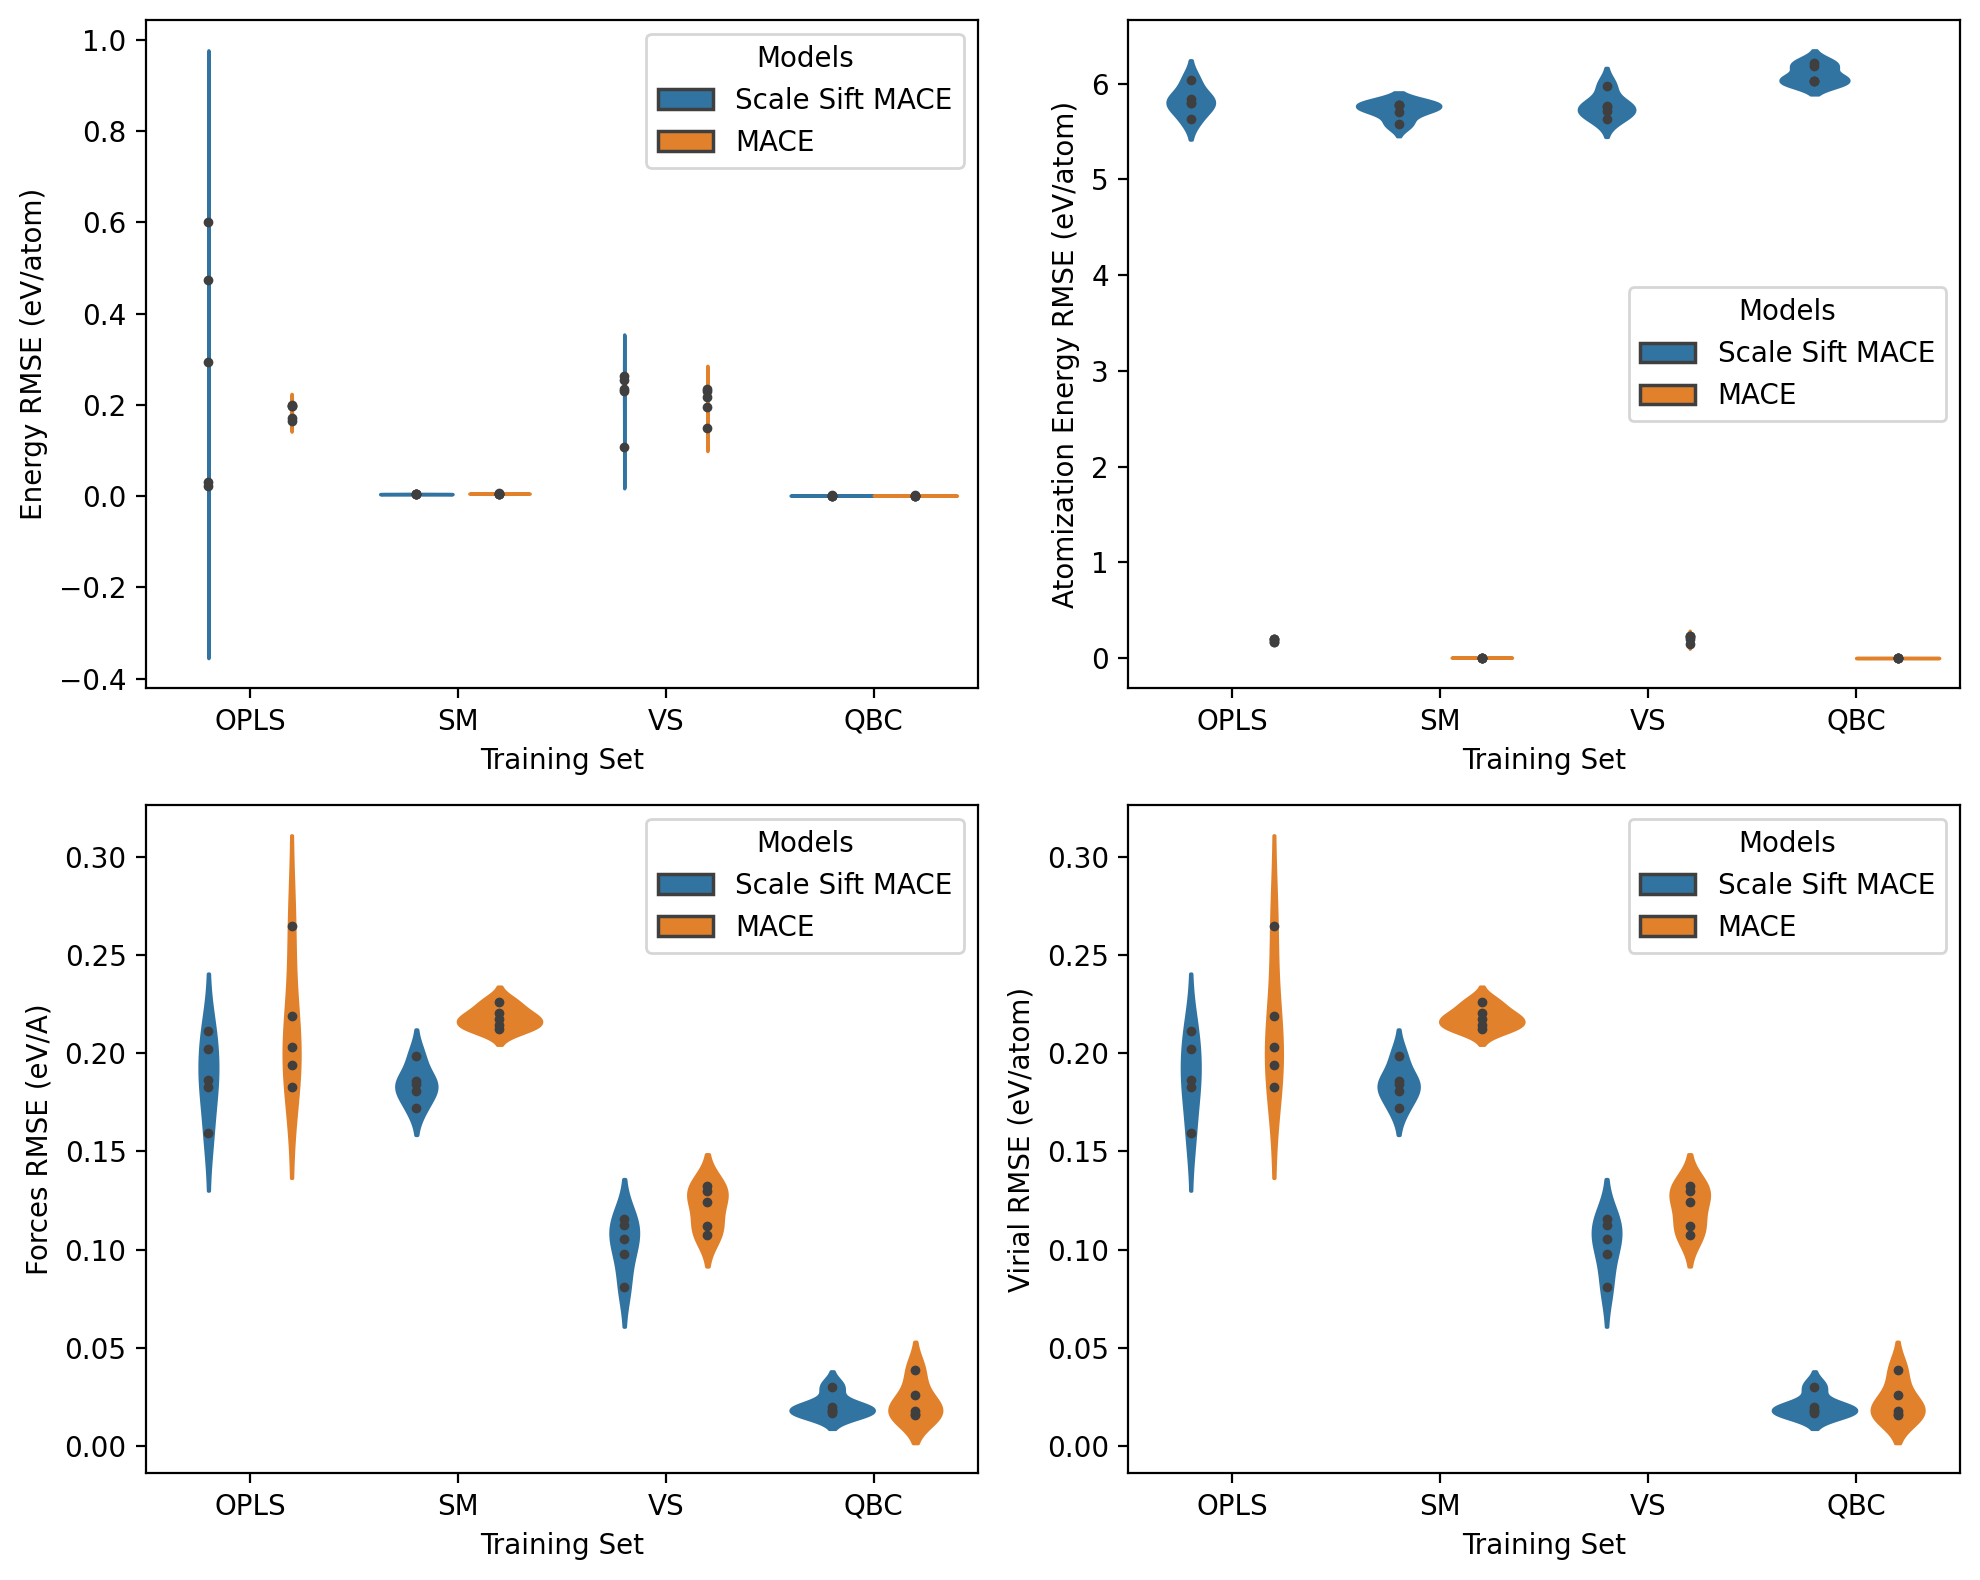

In [31]:
figname = wdir+'figs/RMSE_train.png'
plt.figure(figsize=(10, 8), dpi=200)

#energy
plt.subplot(2,2,1)
sns.violinplot(x='set', y='val', hue='vers', inner='points', data=rmse_df[rmse_df['key'] == 'energy']);
plt.xlabel('Training Set');
plt.ylabel('Energy RMSE (eV/atom)');
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Scale Sift MACE', 'MACE'], title='Models');
for violin in plt.gca().collections:
    face_color = violin.get_facecolor().flatten()
    violin.set_edgecolor(face_color)

#atomization
plt.subplot(2,2,2)
sns.violinplot(x='set', y='val', hue='vers', inner='points', data=rmse_df[rmse_df['key'] == 'atomization']);
plt.xlabel('Training Set');
plt.ylabel('Atomization Energy RMSE (eV/atom)');
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Scale Sift MACE', 'MACE'], title='Models');
for violin in plt.gca().collections:
    face_color = violin.get_facecolor().flatten()
    violin.set_edgecolor(face_color)

#forces
plt.subplot(2,2,3)
sns.violinplot(x='set', y='val', hue='vers', inner='points', data=rmse_df[rmse_df['key'] == 'forces']);
plt.xlabel('Training Set');
plt.ylabel('Forces RMSE (eV/A)');
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Scale Sift MACE', 'MACE'], title='Models');
for violin in plt.gca().collections:
    face_color = violin.get_facecolor().flatten()
    violin.set_edgecolor(face_color)

#virials
plt.subplot(2,2,4)
sns.violinplot(x='set', y='val', hue='vers', inner='points', data=rmse_df[rmse_df['key'] == 'virial']);
plt.xlabel('Training Set');
plt.ylabel('Virial RMSE (eV/atom)');
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Scale Sift MACE', 'MACE'], title='Models');
for violin in plt.gca().collections:
    face_color = violin.get_facecolor().flatten()
    violin.set_edgecolor(face_color)

plt.tight_layout()
plt.savefig(figname, format='png', dpi=300)

In [15]:
rmse_df[rmse_df['set']=='OPLS'][rmse_df['vers']=='old'][rmse_df['key']=='energy']

/var/folders/z7/y1zp_xyx6j50_wxlrmwcdv9m0000gn/T/ipykernel_7785/1225682883.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/z7/y1zp_xyx6j50_wxlrmwcdv9m0000gn/T/ipykernel_7785/1225682883.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,vers,set,mod,key,val
0,old,OPLS,1,energy,0.021369
4,old,OPLS,2,energy,0.293241
8,old,OPLS,3,energy,0.474382
12,old,OPLS,4,energy,0.600504
16,old,OPLS,5,energy,0.030488


### 2. Intra/Inter errors on test set

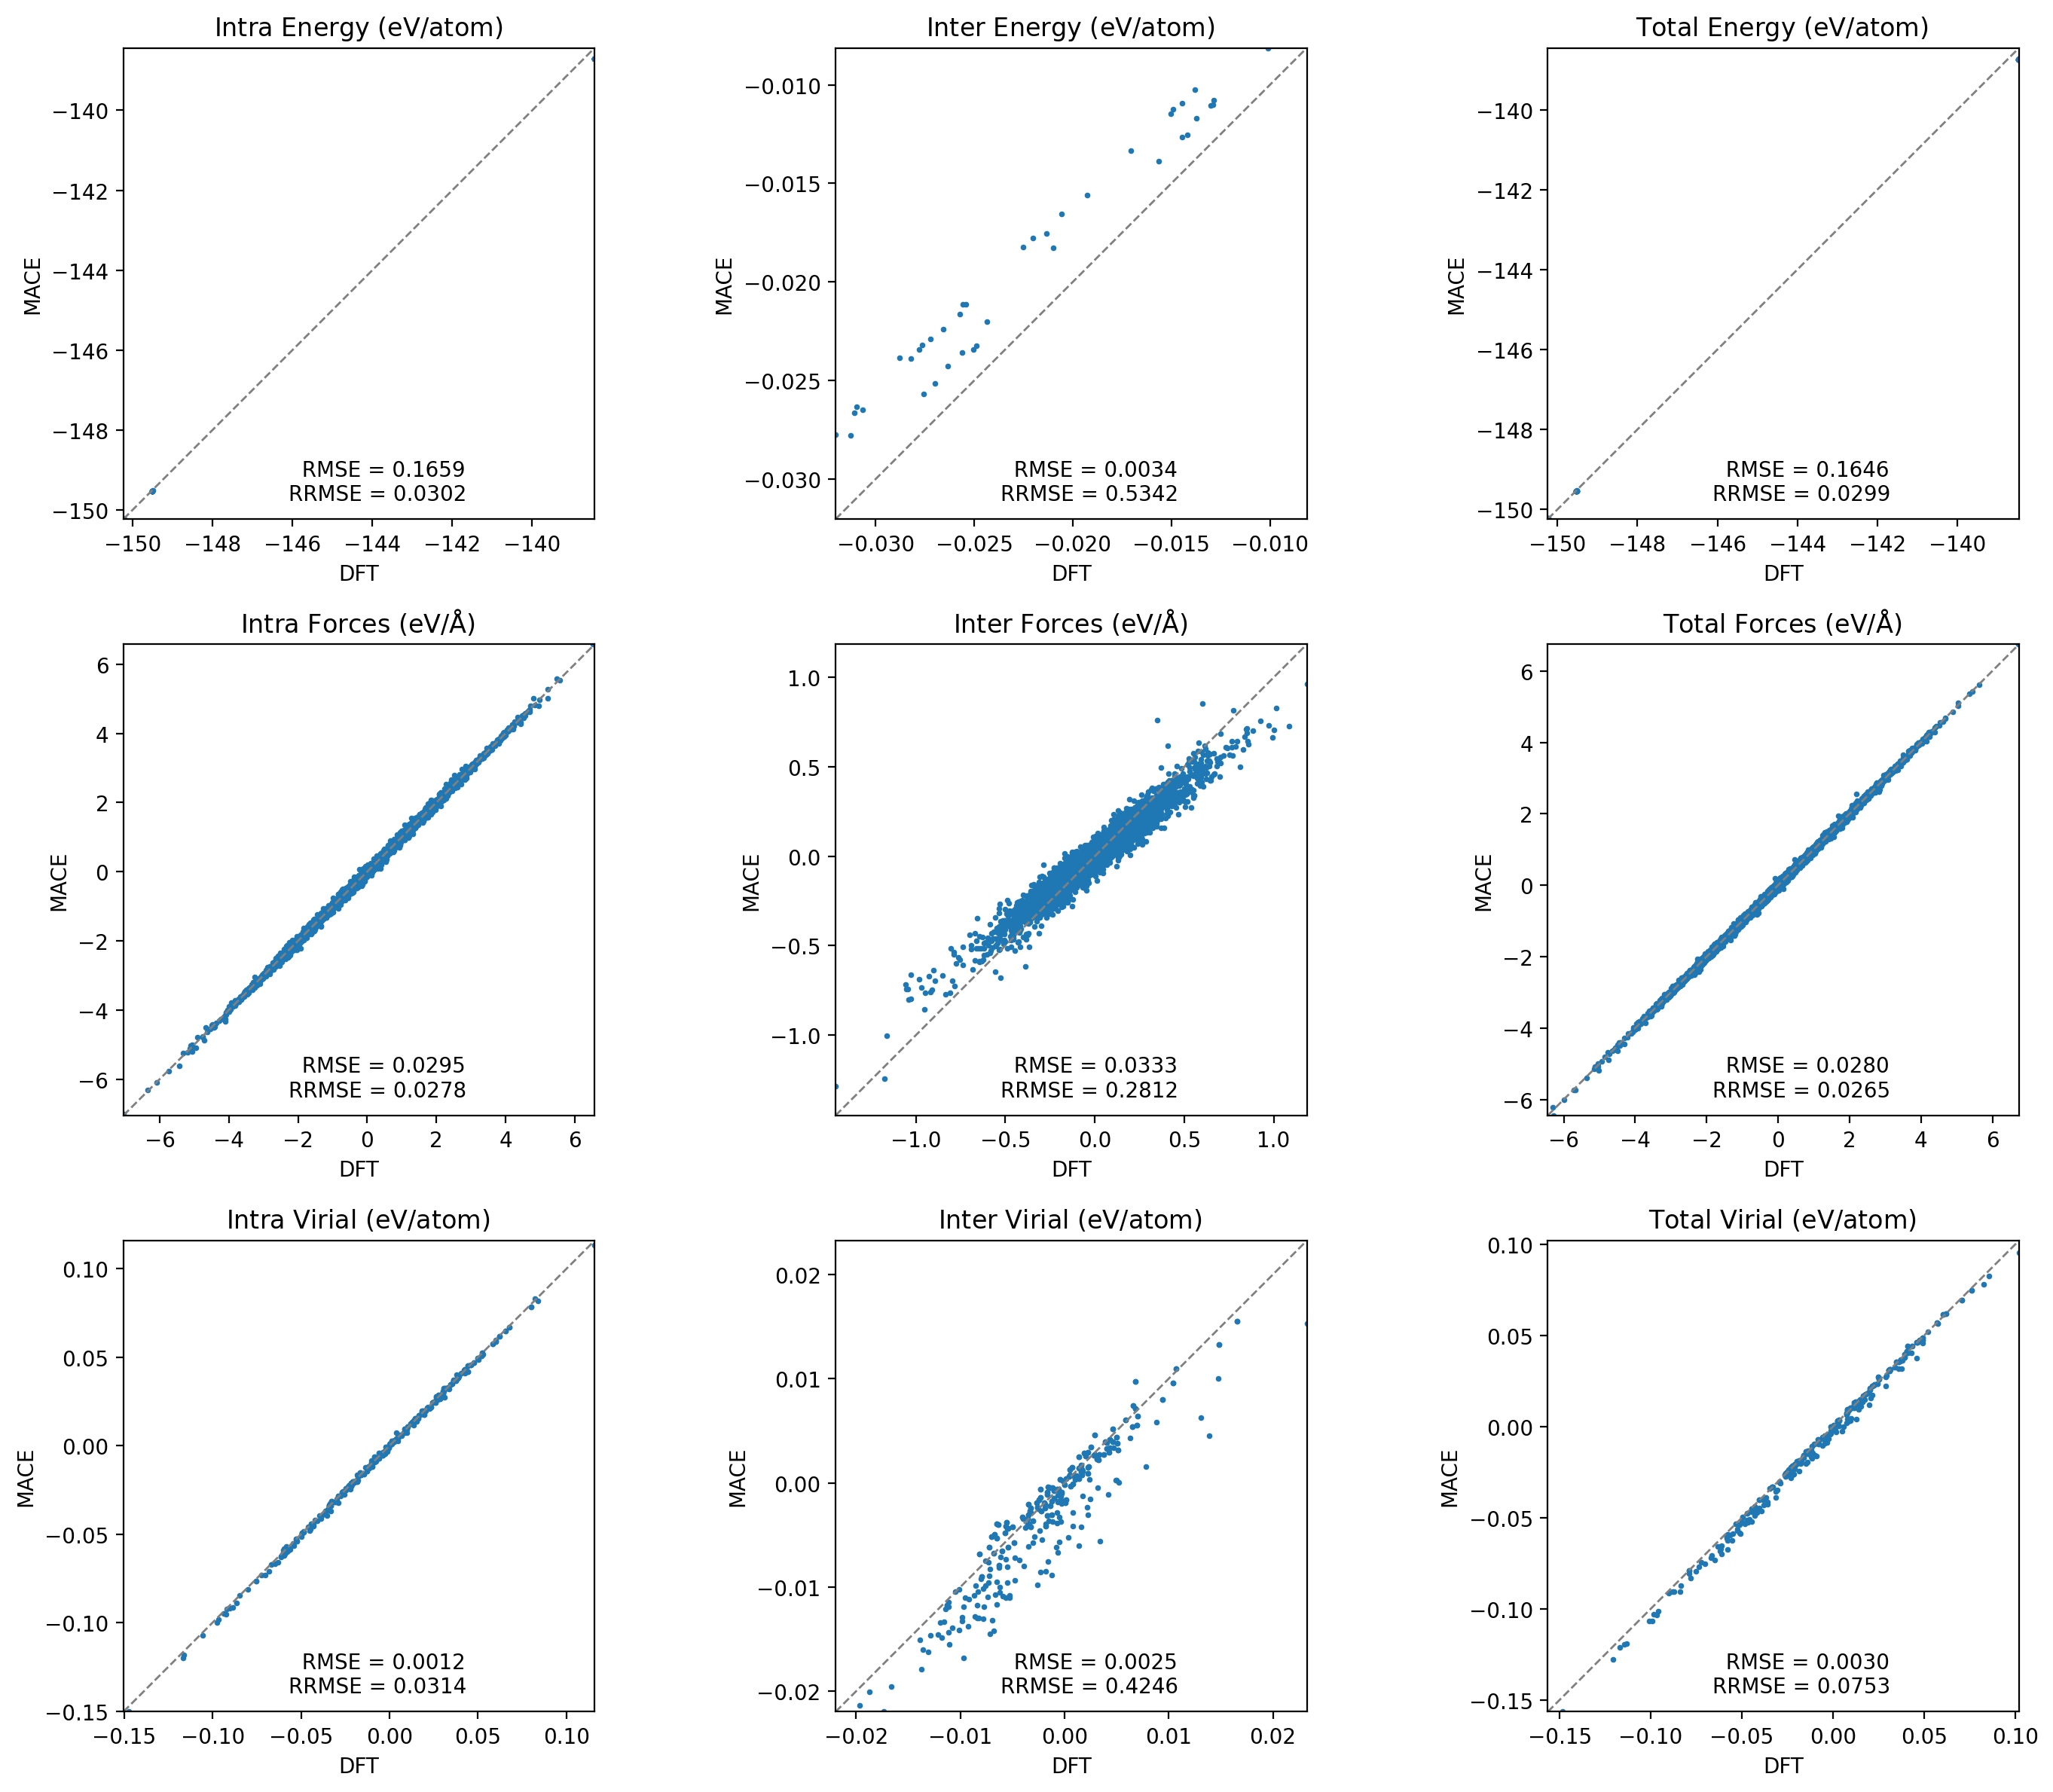

In [16]:
from glob import glob
from ase.io import read
from aseMolec import extAtoms as ea
from aseMolec import anaAtoms as aa
from aseMolec import pltProps as pp
from matplotlib import pyplot as plt
import numpy as np

wdir = '/Users/imagdau/Collaborations/05-SamNibblet/06-MACE-models-4Exp/'
model = 'tests/old/OPLS_3/'
lq_file = 'LiquidConfigs_test40.xyz'
sm_file = 'IsolatedMolecs_test40.xyz'
figname = wdir+'figs/OPLS3_ScaleShiftMACE_intrainter.png'

dat_dft = read(glob(wdir+'tests/PBED2/IntraInterSplit_test40.xyz')[0], ':')
lq_dat_mce = read(glob(wdir+model+lq_file)[0], ':')
sm_dat_mce = read(glob(wdir+model+sm_file)[0], ':')

ea.rename_prop_tag(lq_dat_mce, 'MACE_energy', 'energy')
ea.rename_prop_tag(lq_dat_mce, 'MACE_forces', 'forces')
ea.rename_prop_tag(lq_dat_mce, 'MACE_stress', 'stress')
ea.rename_prop_tag(sm_dat_mce, 'MACE_energy', 'energy')
ea.rename_prop_tag(sm_dat_mce, 'MACE_forces', 'forces')
ea.rename_prop_tag(sm_dat_mce, 'MACE_stress', 'stress')
ea.calc_virial(lq_dat_mce)
ea.calc_virial(sm_dat_mce)
for at in sm_dat_mce:
    at.info['mID'] = at.arrays['molID'][0]
aa.collect_molec_results_dict(lq_dat_mce, sm_dat_mce)

pp.plot_intra_inter(dat_dft, lq_dat_mce, labs=['DFT', 'MACE'])
plt.tight_layout()
plt.savefig(figname, format='png', dpi=300)

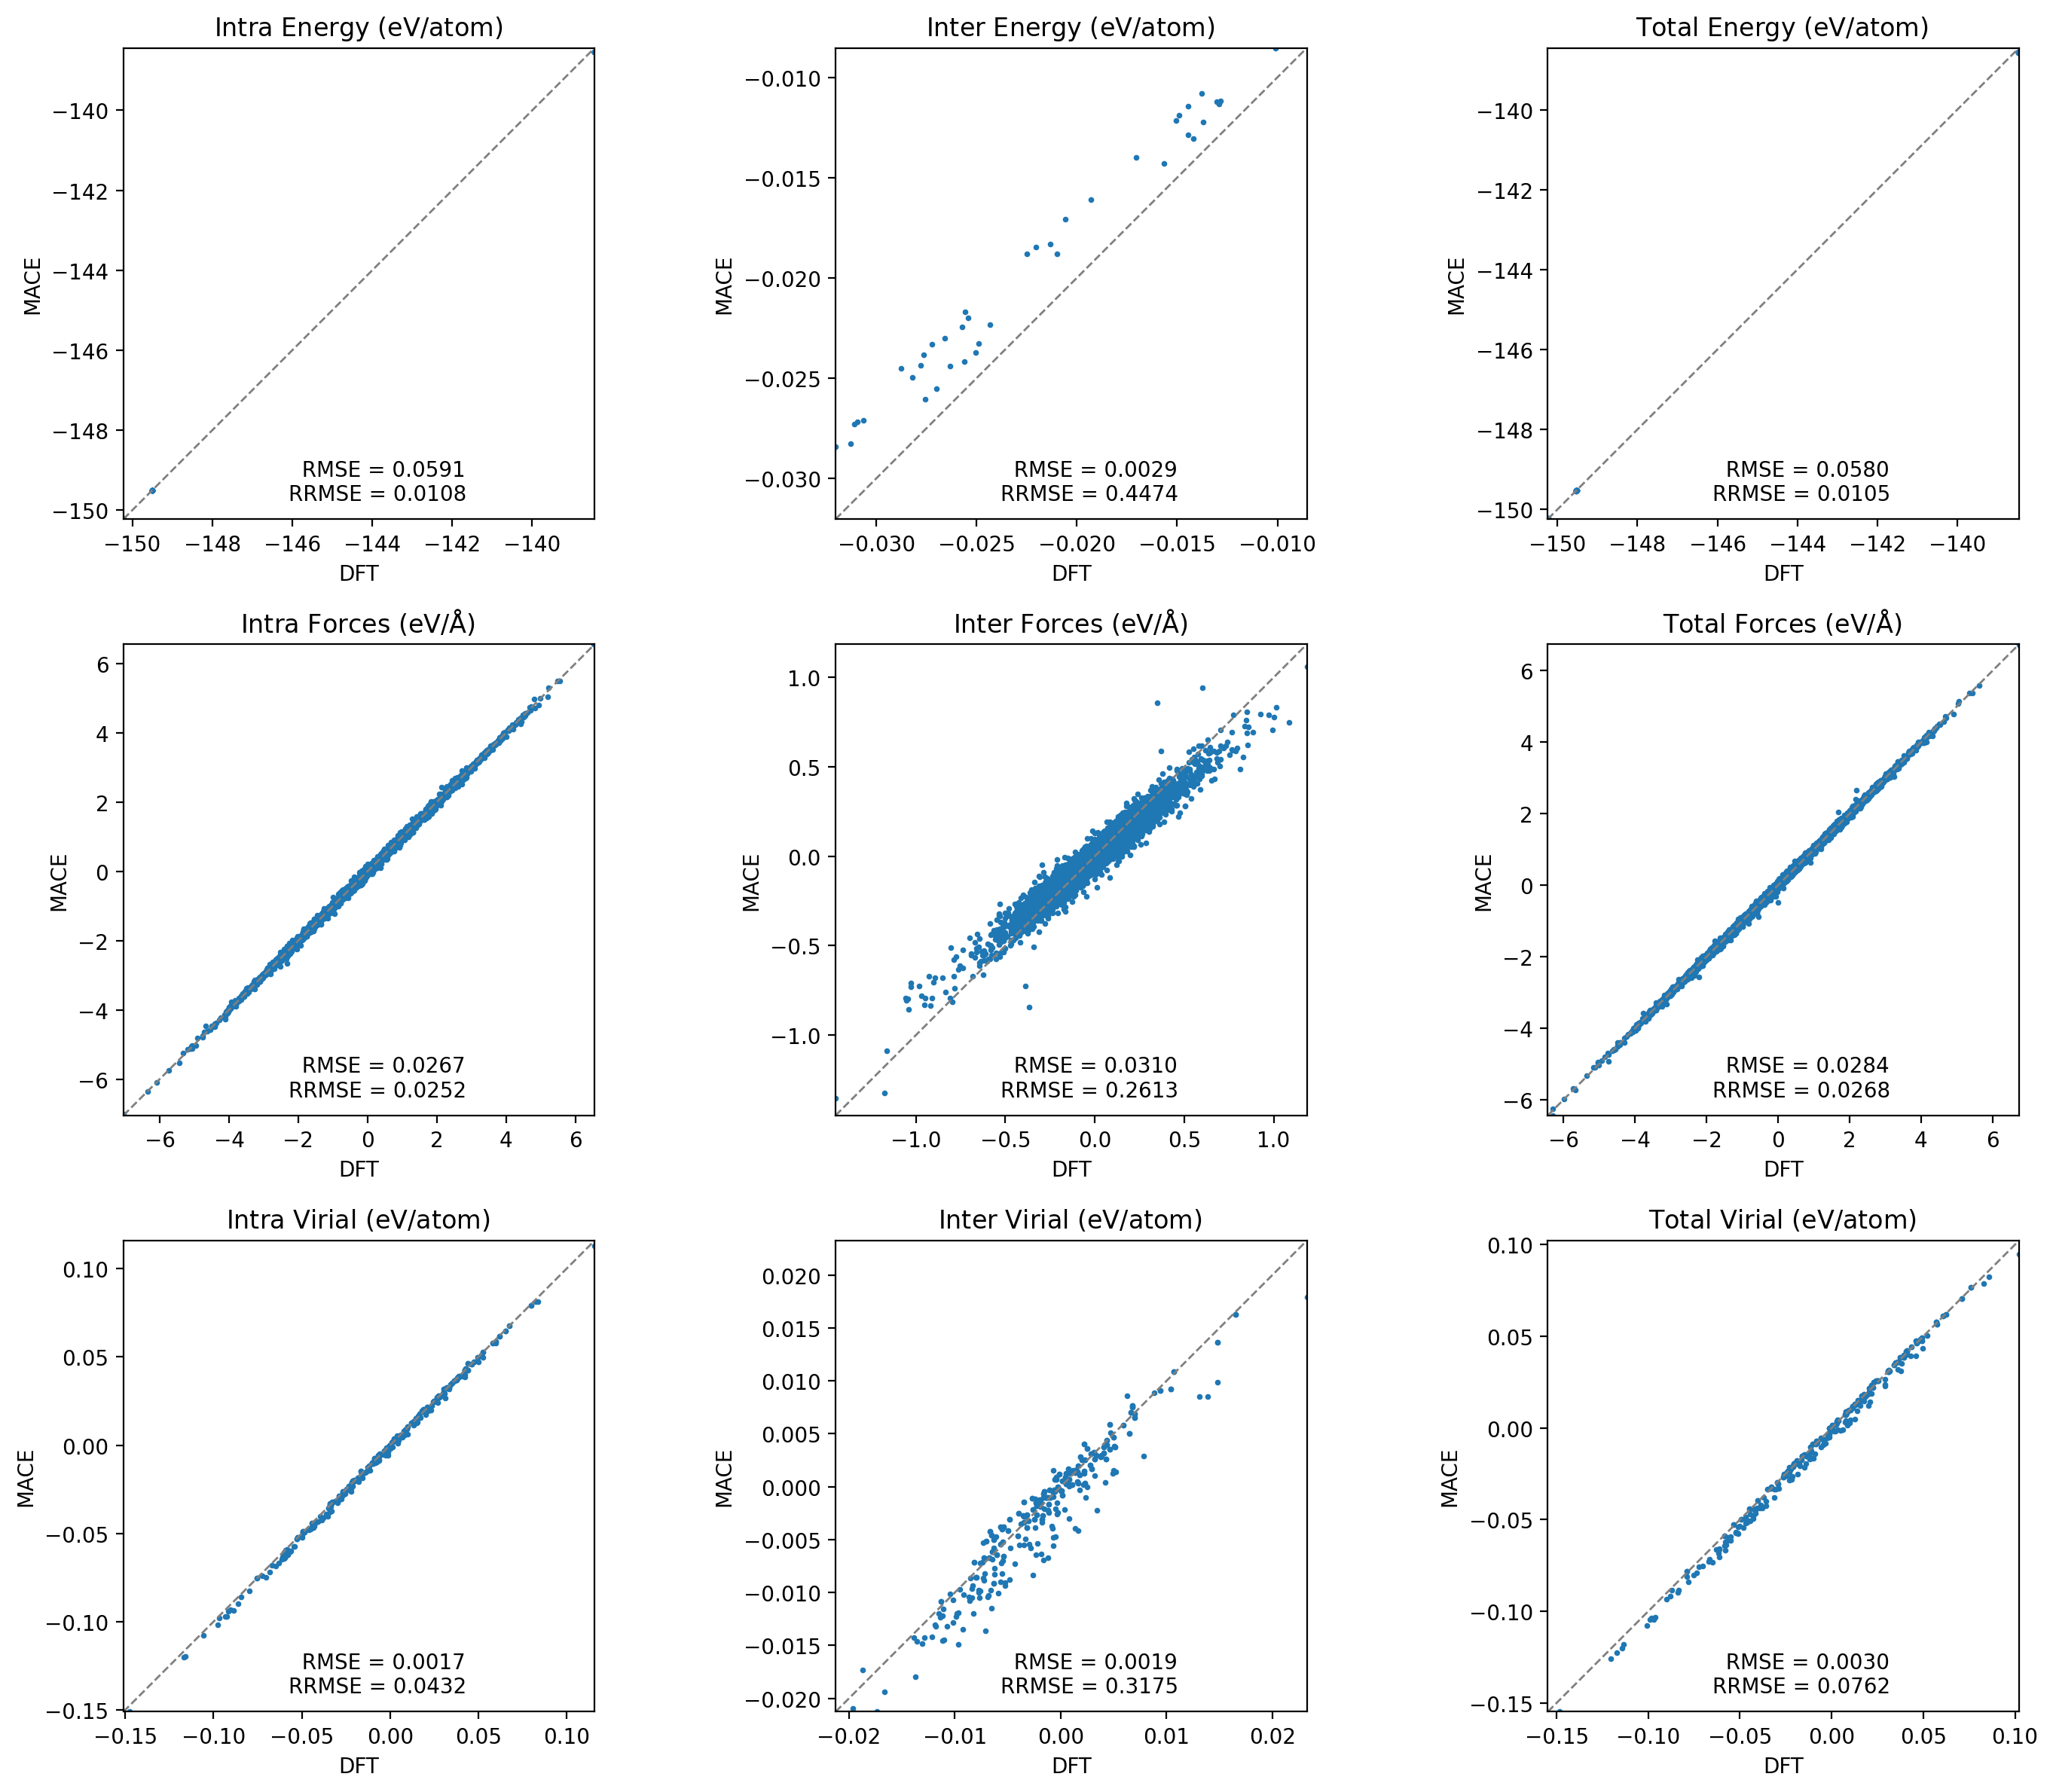

In [17]:
from glob import glob
from ase.io import read
from aseMolec import extAtoms as ea
from aseMolec import anaAtoms as aa
from aseMolec import pltProps as pp
from matplotlib import pyplot as plt
import numpy as np

wdir = '/Users/imagdau/Collaborations/05-SamNibblet/06-MACE-models-4Exp/'
model = 'tests/new/OPLS_3/'
lq_file = 'LiquidConfigs_test40.xyz'
sm_file = 'IsolatedMolecs_test40.xyz'
figname = wdir+'figs/OPLS3_MACE_intrainter.png'

dat_dft = read(glob(wdir+'tests/PBED2/IntraInterSplit_test40.xyz')[0], ':')
lq_dat_mce = read(glob(wdir+model+lq_file)[0], ':')
sm_dat_mce = read(glob(wdir+model+sm_file)[0], ':')

ea.rename_prop_tag(lq_dat_mce, 'MACE_energy', 'energy')
ea.rename_prop_tag(lq_dat_mce, 'MACE_forces', 'forces')
ea.rename_prop_tag(lq_dat_mce, 'MACE_stress', 'stress')
ea.rename_prop_tag(sm_dat_mce, 'MACE_energy', 'energy')
ea.rename_prop_tag(sm_dat_mce, 'MACE_forces', 'forces')
ea.rename_prop_tag(sm_dat_mce, 'MACE_stress', 'stress')
ea.calc_virial(lq_dat_mce)
ea.calc_virial(sm_dat_mce)
for at in sm_dat_mce:
    at.info['mID'] = at.arrays['molID'][0]
aa.collect_molec_results_dict(lq_dat_mce, sm_dat_mce)

pp.plot_intra_inter(dat_dft, lq_dat_mce, labs=['DFT', 'MACE'])
plt.tight_layout()
plt.savefig(figname, format='png', dpi=300)

### 3. Volume Scan errors

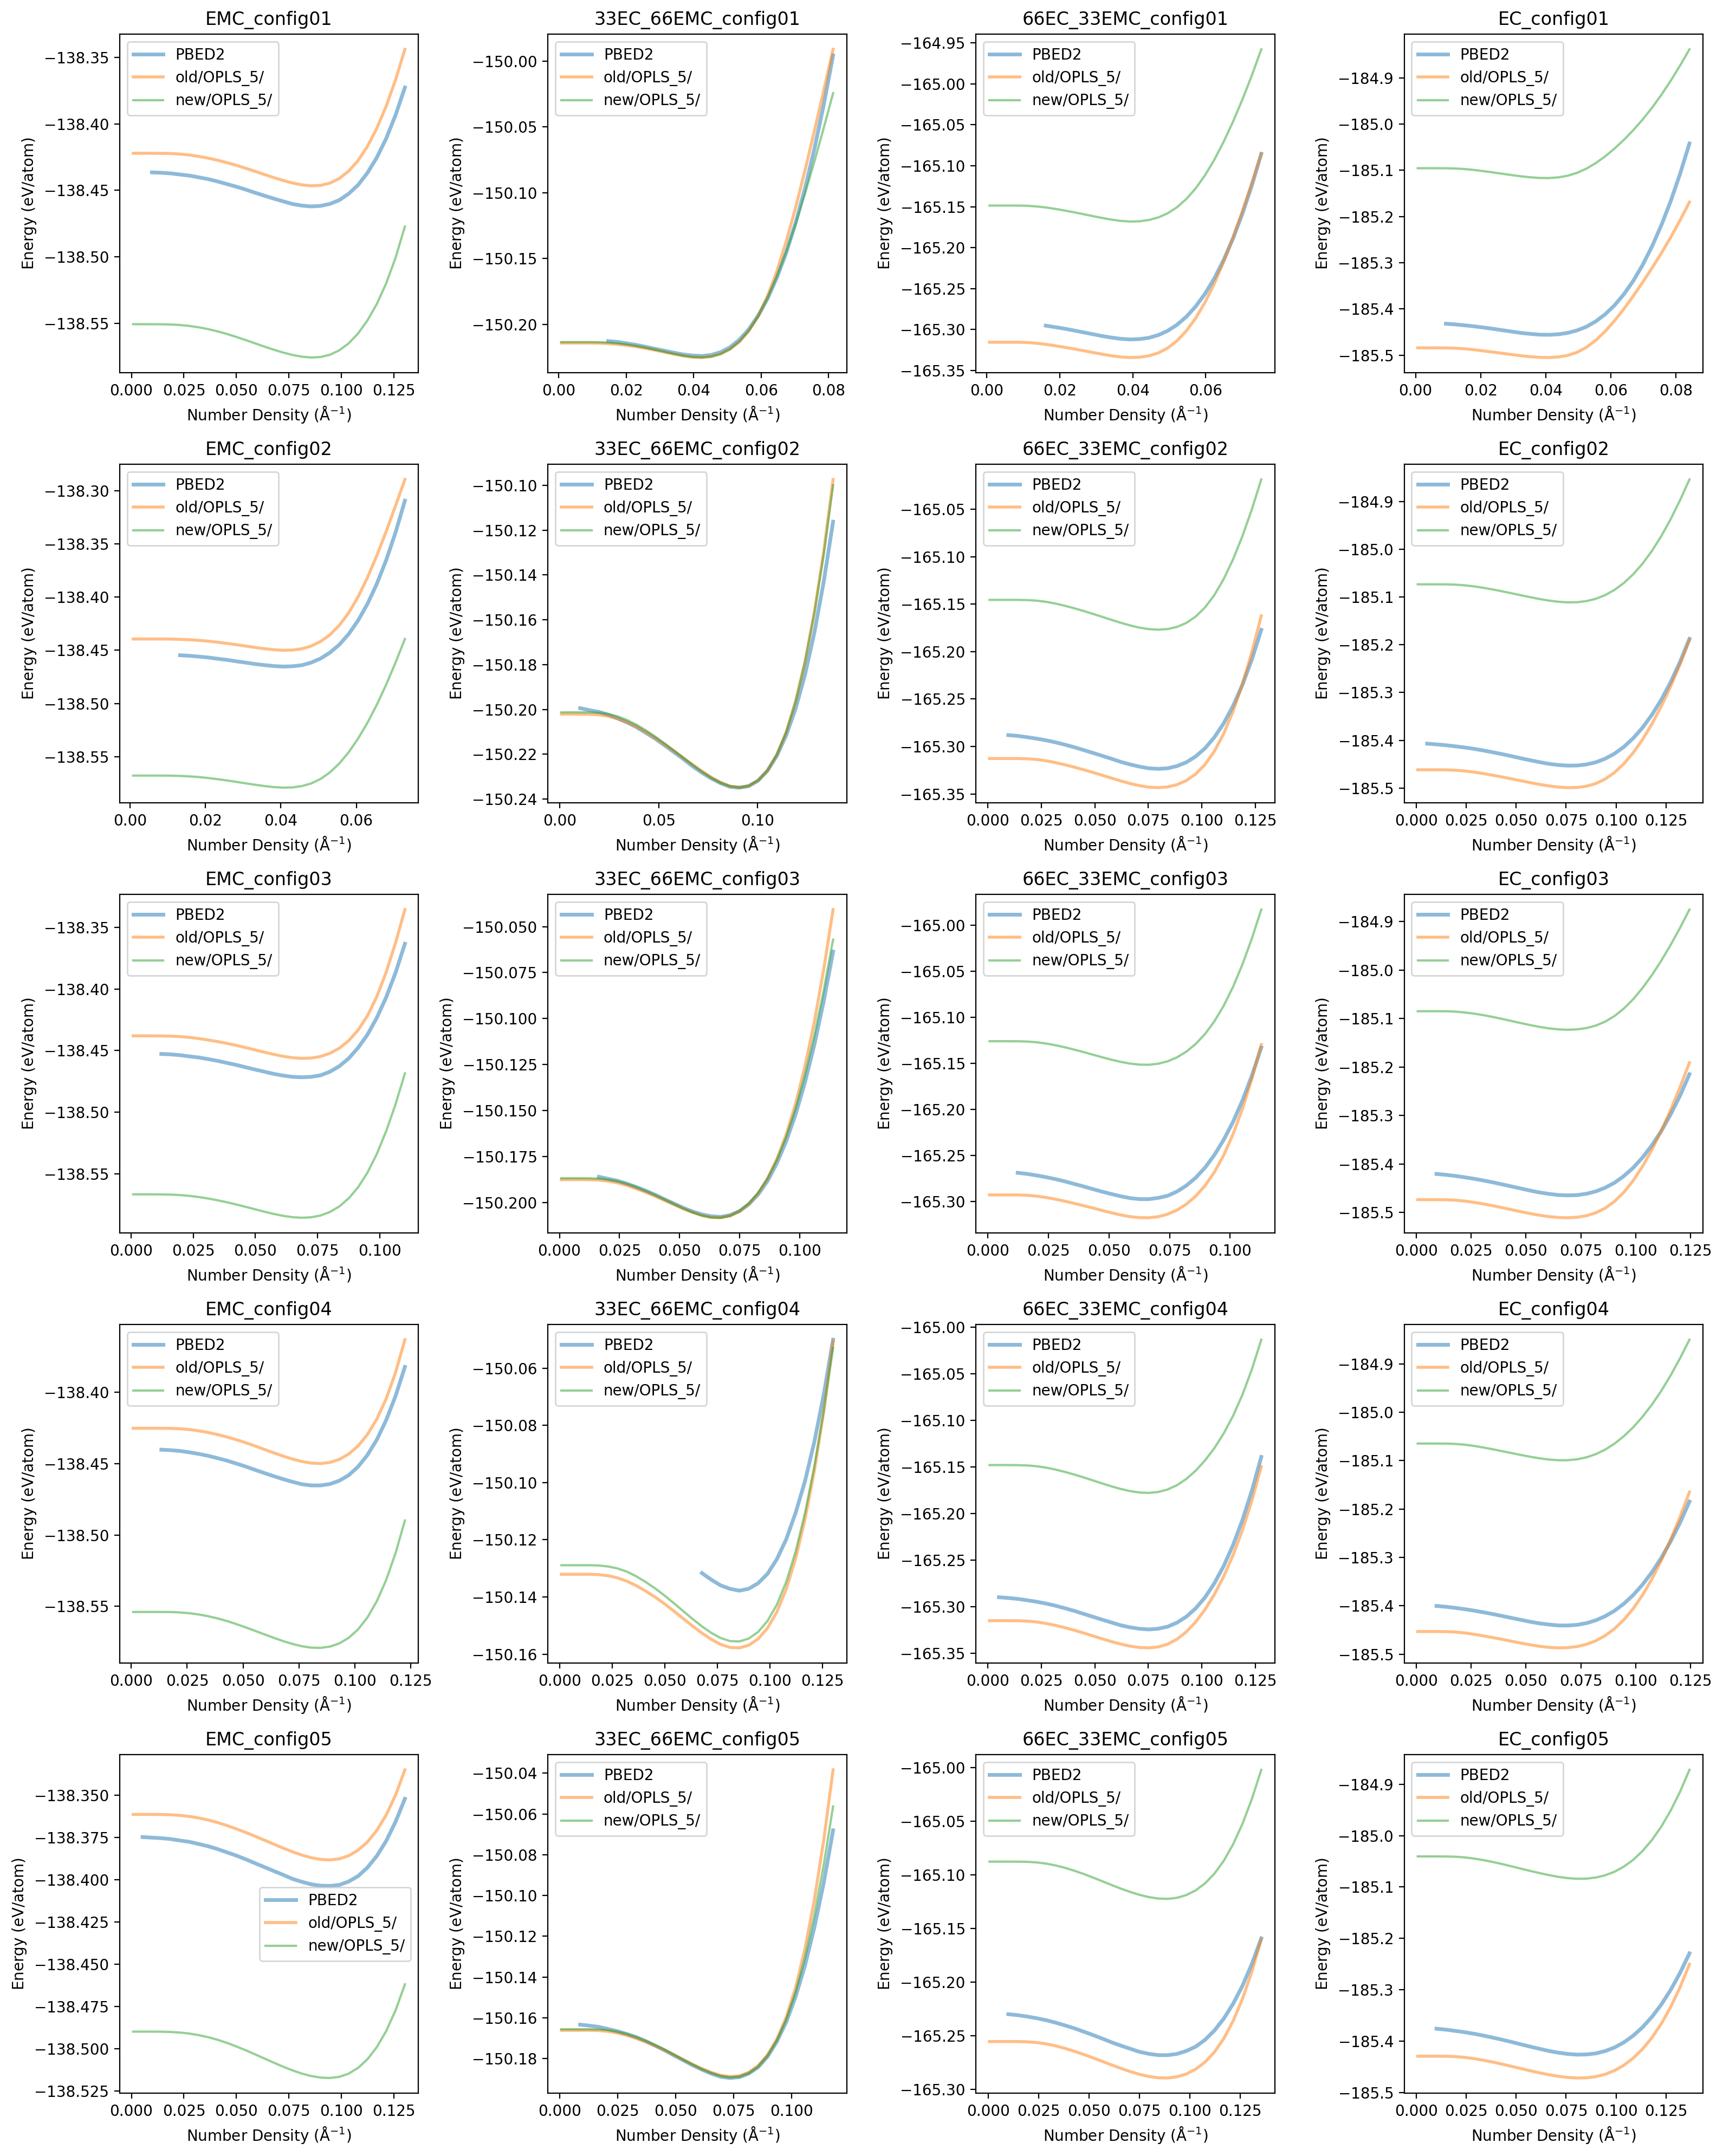

In [18]:
from glob import glob
from ase.io import read
from aseMolec import extAtoms as ea
from aseMolec import anaAtoms as aa
from aseMolec import pltProps as pp
from matplotlib import pyplot as plt
import numpy as np

wdir = '/Users/imagdau/Collaborations/05-SamNibblet/06-MACE-models-4Exp/'
model='OPLS_5'
figname = wdir+'figs/'+''.join(model.split('_'))+'_VScans.png'

def plot_vscan(vsname, vspaths):
    for i, vspath in enumerate(vspaths):
        db = read(wdir+'tests/'+vspath+'/VScan_'+vsname+'.xyz', ':')
        ea.rename_prop_tag(db, 'MACE_energy', 'energy')
        num_dens = ea.get_prop(db, 'meth', 'get_volume', peratom=True)**(-1)
        energy = ea.get_prop(db, 'info', 'energy', peratom=True)
        plt.plot(num_dens, energy, label=vspath, linewidth=(3-i)*0.5+1.0, alpha=0.5)
    plt.xlabel(r'Number Density ($\rm \AA^{-1}$)')
    plt.ylabel(r'Energy ($\rm eV/atom$)')
    plt.legend()
    plt.title(vsname)
    plt.tight_layout()

plt.figure(figsize=(16, 20), dpi=200)
i = 1
for conf in ['01','02','03','04','05']:
    for comp in ['EMC','33EC_66EMC', '66EC_33EMC','EC']:
        plt.subplot(5,4,i)
        plot_vscan(vsname=comp+'_config'+conf, vspaths=['PBED2', 'old/'+model+'/', 'new/'+model+'/'])
        i+=1 
        
plt.tight_layout()
plt.savefig(figname, format='png', dpi=300)